
# Visualization Journey in Python

<img src="img/IE_logo.png" width=400 height=400 align="right">


Visualization Journey in Python:
* from Pandas guessing system, 
* vising matplotlib fundamentals, 
* statiscal graphs with Seaborn, 
* Grammar of graphics from R ggplot in Python using Plotnine
* Dynamic graphics using Bokeh 
* and bulding dynamic dashboards with Dash and Plotly (built on top of Flask and JavaScript)


<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 23/August/2022




In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

C:\Users\roser\AppData\Local\Temp\ipykernel_132276\1256517549.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

In [13]:
!pip install pandas_datareader
!pip install yfinance

In [14]:
#import pandas as pd
#Because the is_list_like is moved to pandas.api.types # - we need to put pd.core.common.is_list_like = pd.api.types.is_list_like before you import pandas_datareader
#pd.core.common.is_list_like = pd.api.types.is_list_like
#from pandas_datareader import data as pdr
#import yfinance #This is fixing an error on data_reader and unabing to download data from Countries other than the USA.

import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [15]:
df = pdr.get_data_yahoo("BTC-USD", start="2020-08-01", end="2022-03-09")
print(df)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2020-07-31  11110.210938  11415.864258  10987.053711  11323.466797   
2020-08-01  11322.570312  11794.775391  11239.682617  11759.592773   
2020-08-02  11758.764648  12034.144531  11018.129883  11053.614258   
2020-08-03  11043.768555  11453.079102  11012.415039  11246.348633   
2020-08-04  11246.203125  11385.381836  11094.145508  11205.892578   
...                  ...           ...           ...           ...   
2022-03-04  42458.140625  42479.613281  38805.847656  39137.605469   
2022-03-05  39148.449219  39566.335938  38777.035156  39400.585938   
2022-03-06  39404.199219  39640.175781  38211.648438  38419.984375   
2022-03-07  38429.304688  39430.226562  37260.203125  38062.039062   
2022-03-08  38059.902344  39304.441406  37957.386719  38737.269531   

               Adj C

In [16]:
df.tail()

Open          High           Low         Close  \
Date                                                                 
2022-03-04  42458.140625  42479.613281  38805.847656  39137.605469   
2022-03-05  39148.449219  39566.335938  38777.035156  39400.585938   
2022-03-06  39404.199219  39640.175781  38211.648438  38419.984375   
2022-03-07  38429.304688  39430.226562  37260.203125  38062.039062   
2022-03-08  38059.902344  39304.441406  37957.386719  38737.269531   

               Adj Close       Volume  
Date                                   
2022-03-04  39137.605469  28516271427  
2022-03-05  39400.585938  16975917450  
2022-03-06  38419.984375  19745229902  
2022-03-07  38062.039062  28546143503  
2022-03-08  38737.269531  25776583476

In [17]:
df.index

DatetimeIndex(['2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03',
               '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
               '2020-08-08', '2020-08-09',
               ...
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08'],
              dtype='datetime64[ns]', name='Date', length=586, freq=None)

In [18]:
df['Close']

Date
2020-07-31    11323.466797
2020-08-01    11759.592773
2020-08-02    11053.614258
2020-08-03    11246.348633
2020-08-04    11205.892578
                  ...     
2022-03-04    39137.605469
2022-03-05    39400.585938
2022-03-06    38419.984375
2022-03-07    38062.039062
2022-03-08    38737.269531
Name: Close, Length: 586, dtype: float64

<AxesSubplot:xlabel='Date'>

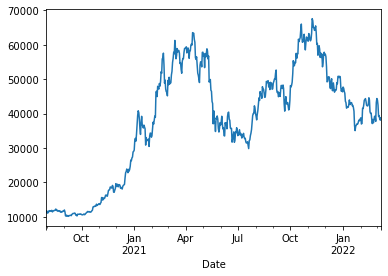

In [19]:
df['Close'].plot()

---

In [20]:
ticker_asia_pacif =  '000001.SS' # SSE Composite Index (000001.SS) -  Shanghai, China

In [21]:
df_index_asia_pacif = pdr.get_data_yahoo(ticker_asia_pacif, start="2020-08-01", end="2021-07-31")
#df_index_asia_pacif = web.DataReader(ticker_asia_pacif,"yahoo", '12/01/2012', '12/01/2017')
#df_index_asia_pacif = web.DataReader(ticker_asia_pacif,"yahoo", start='12/01/2012', end='12/01/2017')
#df_index_asia_pacif = web.DataReader(name=ticker_asia_pacif,data_source="yahoo", start='12/01/2012', end='12/01/2017')
#df_index_asia_pacif = web.DataReader(data_source="yahoo",name=ticker_asia_pacif, end='12/01/2017',start='12/01/2012')

df_index_asia_pacif.head()


[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-08-03  3332.183105  3368.103027  3327.677002  3367.966064  3367.966064   
2020-08-04  3376.439941  3391.070068  3352.500000  3371.689941  3371.689941   
2020-08-05  3363.330078  3383.639893  3333.879883  3377.560059  3377.560059   
2020-08-06  3380.760010  3392.699951  3334.330078  3386.459961  3386.459961   
2020-08-07  3370.587891  3374.133057  3307.712891  3354.034912  3354.034912   

            Volume  
Date                
2020-08-03  407500  
2020-08-04  442300  
2020-08-05  385800  
2020-08-06  415300  
2020-08-07  403900

In [22]:
type(df_index_asia_pacif)

pandas.core.frame.DataFrame

In [23]:
df_index_asia_pacif.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2020-08-03 to 2021-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       243 non-null    float64
 1   High       243 non-null    float64
 2   Low        243 non-null    float64
 3   Close      243 non-null    float64
 4   Adj Close  243 non-null    float64
 5   Volume     243 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB


In [24]:
df_index_asia_pacif.shape

(243, 6)

In [25]:
df_index_asia_pacif.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-08-03  3332.183105  3368.103027  3327.677002  3367.966064  3367.966064   
2020-08-04  3376.439941  3391.070068  3352.500000  3371.689941  3371.689941   
2020-08-05  3363.330078  3383.639893  3333.879883  3377.560059  3377.560059   
2020-08-06  3380.760010  3392.699951  3334.330078  3386.459961  3386.459961   
2020-08-07  3370.587891  3374.133057  3307.712891  3354.034912  3354.034912   

            Volume  
Date                
2020-08-03  407500  
2020-08-04  442300  
2020-08-05  385800  
2020-08-06  415300  
2020-08-07  403900

In [26]:
df_index_asia_pacif.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [27]:
df_index_asia_pacif.index

DatetimeIndex(['2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14',
               ...
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30'],
              dtype='datetime64[ns]', name='Date', length=243, freq=None)

## Let's check if we have any data that is null.

In [28]:
df_index_asia_pacif.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
df_index_asia_pacif.describe()

Open         High          Low        Close    Adj Close  \
count   243.000000   243.000000   243.000000   243.000000   243.000000   
mean   3442.073044  3462.520234  3418.901399  3443.389803  3443.389803   
std     108.485660   109.258625   107.625074   109.235515   109.235515   
min    3224.977051  3238.183105  3202.343994  3217.534912  3217.534912   
25%    3361.266479  3382.890503  3337.360474  3363.100464  3363.100464   
50%    3435.731934  3454.460938  3414.313965  3441.280029  3441.280029   
75%    3531.027954  3554.684448  3508.848511  3531.972534  3531.972534   
max    3721.086914  3731.687012  3663.664062  3696.167969  3696.167969   

              Volume  
count     243.000000  
mean   298078.600823  
std     64478.464235  
min    149100.000000  
25%    259100.000000  
50%    298500.000000  
75%    340050.000000  
max    488800.000000

In case we have NaNs, it's good idea to do something with it. In this case let's get read of the entire row with NaNs as they represent Holidays that were included by mistake.

In [30]:
df_index_asia_pacif = df_index_asia_pacif.dropna()

In [31]:
df_index_asia_pacif.describe()

Open         High          Low        Close    Adj Close  \
count   243.000000   243.000000   243.000000   243.000000   243.000000   
mean   3442.073044  3462.520234  3418.901399  3443.389803  3443.389803   
std     108.485660   109.258625   107.625074   109.235515   109.235515   
min    3224.977051  3238.183105  3202.343994  3217.534912  3217.534912   
25%    3361.266479  3382.890503  3337.360474  3363.100464  3363.100464   
50%    3435.731934  3454.460938  3414.313965  3441.280029  3441.280029   
75%    3531.027954  3554.684448  3508.848511  3531.972534  3531.972534   
max    3721.086914  3731.687012  3663.664062  3696.167969  3696.167969   

              Volume  
count     243.000000  
mean   298078.600823  
std     64478.464235  
min    149100.000000  
25%    259100.000000  
50%    298500.000000  
75%    340050.000000  
max    488800.000000

In [32]:
df_index_asia_pacif.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## Working with time series (the index is a date)

In [33]:
df_index_asia_pacif.index

DatetimeIndex(['2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14',
               ...
               '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
               '2021-07-23', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30'],
              dtype='datetime64[ns]', name='Date', length=243, freq=None)

In [34]:
df_index_asia_pacif.resample('M').last()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-08-31  3416.550049  3442.736084  3395.468018  3395.677979  3395.677979   
2020-09-30  3232.709961  3244.913086  3202.343994  3218.052002  3218.052002   
2020-10-31  3278.631104  3279.855957  3219.422119  3224.532959  3224.532959   
2020-11-30  3418.159912  3456.739990  3391.760010  3391.760010  3391.760010   
2020-12-31  3419.727051  3474.917969  3419.727051  3473.069092  3473.069092   
2021-01-31  3521.718018  3531.597900  3446.547119  3483.069092  3483.069092   
2021-02-28  3514.560059  3550.409912  3500.699951  3509.080078  3509.080078   
2021-03-31  3452.209961  3452.209961  3420.830078  3441.909912  3441.909912   
2021-04-30  3468.300049  3469.090088  3426.899902  3446.860107  3446.860107   
2021-05-31  3600.070068  3615.659912  3580.649902  3615.479980  3615.479980   
2021-06-30  3572.620117  3594.120117  3569.500000  3591.199951  3591.199951   
2021-07-31  3398.199951  3404.879883  3370.449951  3397.360107  3397.360107   

            Volume  
Date                
2020-08-31  323500  
2020-09-30  153500  
2020-10-31  230200  
2020-11-30  385000  
2020-12-31  335700  
2021-01-31  293700  
2021-02-28  333300  
2021-03-31  283000  
2021-04-30  312700  
2021-05-31  331500  
2021-06-30  268200  
2021-07-31  381400

In [35]:
df_index_asia_pacif.resample('M').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-08-31  3371.160784  3394.932524  3343.908877  3374.214053  3374.214053   
2020-09-30  3295.020153  3311.438821  3269.523537  3288.863303  3288.863303   
2020-10-31  3301.156006  3319.075134  3279.856918  3301.739685  3301.739685   
2020-11-30  3342.221005  3360.622768  3324.611607  3345.486770  3345.486770   
2020-12-31  3395.751433  3416.074930  3377.183636  3399.719514  3399.719514   
2021-01-31  3562.260901  3587.039502  3535.011511  3566.427917  3566.427917   
2021-02-28  3576.409538  3605.434717  3548.304915  3576.935010  3576.935010   
2021-03-31  3444.340226  3468.705121  3413.392514  3442.978123  3442.978123   
2021-04-30  3451.674200  3467.482678  3432.109631  3453.505336  3453.505336   
2021-05-31  3496.486681  3521.073337  3481.672228  3508.935588  3508.935588   
2021-06-30  3575.254767  3592.806687  3557.677130  3575.853341  3575.853341   
2021-07-31  3519.002497  3534.147761  3490.145630  3513.871604  3513.871604   

                   Volume  
Date                       
2020-08-31  350433.333333  
2020-09-30  223000.000000  
2020-10-31  189800.000000  
2020-11-30  270504.761905  
2020-12-31  280221.739130  
2021-01-31  331985.000000  
2021-02-28  322713.333333  
2021-03-31  323504.347826  
2021-04-30  271204.761905  
2021-05-31  322305.555556  
2021-06-30  318271.428571  
2021-07-31  359272.727273

In [36]:
df_index_asia_pacif.resample('Q').last()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-09-30  3232.709961  3244.913086  3202.343994  3218.052002  3218.052002   
2020-12-31  3419.727051  3474.917969  3419.727051  3473.069092  3473.069092   
2021-03-31  3452.209961  3452.209961  3420.830078  3441.909912  3441.909912   
2021-06-30  3572.620117  3594.120117  3569.500000  3591.199951  3591.199951   
2021-09-30  3398.199951  3404.879883  3370.449951  3397.360107  3397.360107   

            Volume  
Date                
2020-09-30  153500  
2020-12-31  335700  
2021-03-31  283000  
2021-06-30  268200  
2021-09-30  381400

In [37]:
df_index_asia_pacif.resample('2Q').last()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-09-30  3232.709961  3244.913086  3202.343994  3218.052002  3218.052002   
2021-03-31  3452.209961  3452.209961  3420.830078  3441.909912  3441.909912   
2021-09-30  3398.199951  3404.879883  3370.449951  3397.360107  3397.360107   

            Volume  
Date                
2020-09-30  153500  
2021-03-31  283000  
2021-09-30  381400

In [38]:
df_index_asia_pacif.resample('Y').last()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-12-31  3419.727051  3474.917969  3419.727051  3473.069092  3473.069092   
2021-12-31  3398.199951  3404.879883  3370.449951  3397.360107  3397.360107   

            Volume  
Date                
2020-12-31  335700  
2021-12-31  381400

## Ploting graph using Pandas Built-in Matplotlib fuction

<AxesSubplot:xlabel='Date'>

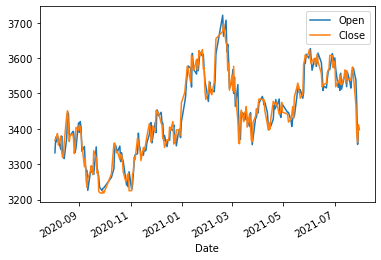

In [39]:
df_index_asia_pacif[['Open','Close']].plot()

In [40]:
%matplotlib inline

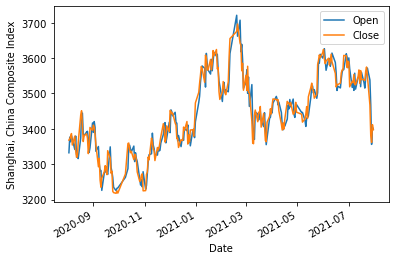

In [41]:
migrafica = df_index_asia_pacif[['Open','Close']].plot()
migrafica.set_xlabel('Date')
migrafica.set_ylabel('Shanghai, China Composite Index')
migrafica.legend()

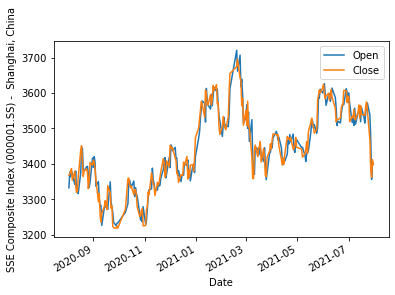

In [42]:
%matplotlib inline
ax = df_index_asia_pacif[['Open','Close']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('SSE Composite Index (000001.SS) -  Shanghai, China')
ax.legend()

<AxesSubplot:xlabel='Date'>

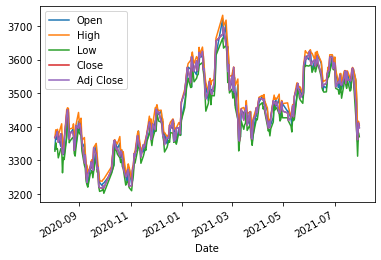

In [43]:
df_index_asia_pacif[["Open", "High", "Low", "Close",'Adj Close']].plot()

<AxesSubplot:>

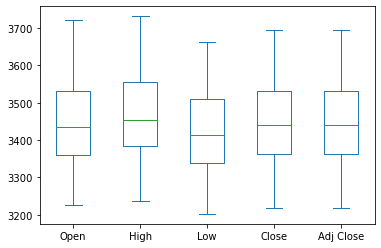

In [44]:
df_index_asia_pacif[["Open", "High", "Low", "Close",'Adj Close']].plot.box()

## Reading more than one time serie and merging it in one dataframe.


In [45]:
#########################################
#                                       #
#              READING DATA             #
#                                       #
#########################################
import pandas_datareader.data as web
import pandas as pd
import time

ticker_asia_pacif =  '000001.SS' # SSE Composite Index (000001.SS) -  Shanghai, China
ticker_europe_africa_middleeast = '^FCHI'  # CAC 40 (^FCHI) - Paris, France
ticker_americas = '^BVSP' # IBOVESPA (^BVSP) - Sao Paolo, Brazil

#YAHOO is very unstable lately, so it is a good idea to insist until it reads. Actually, t can be a good idea to put a
# loop to insist in the job of grabbing the data and waiting 5 seccounds for next try.
run_ok = 0
numb_tries = 0 
while(run_ok == 0) and (numb_tries < 10):
    try:        
        numb_tries += 1
        
        
        
        df_index_asia_pacif = pdr.get_data_yahoo(ticker_asia_pacif, start="2017-01-12", end="2022-03-17")
        df_index_europe_africa_middleeast = pdr.get_data_yahoo(ticker_europe_africa_middleeast, start="2017-01-12", end="2022-03-17")
        df_index_americas = pdr.get_data_yahoo(ticker_americas, start="2017-01-12", end="2022-03-17")
#        df_index_asia_pacif = pdr.get_data_yahoo(ticker_asia_pacif, start='2012-01-12', end='2017-01-12')
#        df_index_europe_africa_middleeast = pdr.get_data_yahoo(ticker_europe_africa_middleeast, start='2012-01-12', end='2017-01-12')
#        df_index_americas = pdr.get_data_yahoo(ticker_americas, start='2012-01-12', end='2017-01-12')       
        run_ok = 1
    except:
        print ("-> PROBLEM WITH YAHOO - SLEEPING 5 seconds")
        time.sleep(5)
        run_ok = 0

  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [46]:
df_index_asia_pacif.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-03-10  3312.179932  3326.580078  3291.239990  3296.090088  3296.090088   
2022-03-11  3259.320068  3315.659912  3217.419922  3309.750000  3309.750000   
2022-03-14  3271.889893  3297.800049  3223.530029  3223.530029  3223.530029   
2022-03-15  3192.360107  3196.919922  3063.969971  3063.969971  3063.969971   
2022-03-16  3107.669922  3177.790039  3023.300049  3170.709961  3170.709961   

            Volume  
Date                
2022-03-10  378300  
2022-03-11  384100  
2022-03-14  338000  
2022-03-15  465000  
2022-03-16  444700

In [47]:
df_index_europe_africa_middleeast.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-03-10  6376.569824  6380.770020  6166.109863  6207.200195  6207.200195   
2022-03-11  6233.120117  6466.120117  6165.410156  6260.250000  6260.250000   
2022-03-14  6298.959961  6421.080078  6271.819824  6369.939941  6369.939941   
2022-03-15  6294.720215  6383.750000  6206.049805  6355.000000  6355.000000   
2022-03-16  6484.330078  6680.000000  6481.700195  6588.640137  6588.640137   

               Volume  
Date                   
2022-03-10  148747200  
2022-03-11  136389500  
2022-03-14  113227400  
2022-03-15  102702800  
2022-03-16  145251100

In [48]:
df_index_americas.tail()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2022-03-10  113900.0  113939.0  111889.0  113663.0   113663.0  12984000
2022-03-11  113664.0  114627.0  111332.0  111713.0   111713.0  12475800
2022-03-14  111716.0  112299.0  109717.0  109928.0   109928.0  10480900
2022-03-15  109925.0  109925.0  107781.0  108959.0   108959.0  13653800
2022-03-16  108958.0  111183.0  108958.0  111112.0   111112.0  13205200

In [49]:
df_merged = pd.DataFrame({ 'adj_close_asia_pacif': df_index_asia_pacif['Adj Close'],
                            'adj_close_europe_africa_middleeast': df_index_europe_africa_middleeast['Adj Close'],
                            'adj_close_americas': df_index_americas['Adj Close']},
                        index=sorted(set(df_index_asia_pacif.index).union(df_index_europe_africa_middleeast.index).union(df_index_americas.index))) 


Now that we merged data from 3 different countries, holidays are different, so we start having data in one day for one country, but not for others. We have to do something with the missing!

In [50]:
df_merged.head(30)

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2017-01-11                   NaN                                 NaN   
2017-01-12           3119.289062                         4863.970215   
2017-01-13           3112.763916                         4922.490234   
2017-01-16           3103.427979                         4882.180176   
2017-01-17           3108.774902                         4859.689941   
2017-01-18           3113.011963                         4853.399902   
2017-01-19           3101.299072                         4841.140137   
2017-01-20           3123.138916                         4850.669922   
2017-01-23           3136.774902                         4821.410156   
2017-01-24           3142.552979                         4830.029785   
2017-01-25           3149.554932                         4877.669922   
2017-01-26           3159.166016                         4867.240234   
2017-01-27                   NaN                         4839.979980   
2017-01-30                   NaN                         4784.640137   
2017-01-31                   NaN                         4748.899902   
2017-02-01                   NaN                         4794.580078   
2017-02-02                   NaN                         4794.290039   
2017-02-03           3140.169922                         4825.419922   
2017-02-06           3156.983887                         4778.080078   
2017-02-07           3153.087891                         4754.470215   
2017-02-08           3166.981934                         4766.600098   
2017-02-09           3183.178955                         4826.240234   
2017-02-10           3196.698975                         4828.319824   
2017-02-13           3216.839111                         4888.189941   
2017-02-14           3217.927979                         4895.819824   
2017-02-15           3212.986084                         4924.859863   
2017-02-16           3229.617920                         4899.459961   
2017-02-17           3202.075928                         4867.580078   
2017-02-20           3239.960938                         4864.990234   
2017-02-21           3253.325928                         4888.759766   

            adj_close_americas  
2017-01-11             62446.0  
2017-01-12             63954.0  
2017-01-13             63652.0  
2017-01-16             63831.0  
2017-01-17             64354.0  
2017-01-18             64150.0  
2017-01-19             63951.0  
2017-01-20             64521.0  
2017-01-23             65749.0  
2017-01-24             65840.0  
2017-01-25                 NaN  
2017-01-26             66191.0  
2017-01-27             66034.0  
2017-01-30             64302.0  
2017-01-31             64671.0  
2017-02-01             64836.0  
2017-02-02             64578.0  
2017-02-03             64954.0  
2017-02-06             63993.0  
2017-02-07             64199.0  
2017-02-08             64835.0  
2017-02-09             64965.0  
2017-02-10             66125.0  
2017-02-13             66968.0  
2017-02-14             66713.0  
2017-02-15             67976.0  
2017-02-16             67814.0  
2017-02-17             67748.0  
2017-02-20             68533.0  
2017-02-21             69052.0

In [51]:
df_merged.isnull().sum()

adj_close_asia_pacif                  88
adj_close_europe_africa_middleeast    18
adj_close_americas                    64
dtype: int64

Reindexing will insert missing values (NaN) for the dates that were not present in the original set. To cope with this, we can fill the missing by replacing them with the latest available price for each instrument, which is more correct in this context than dropping the rows using dropna.

In [52]:
df_merged = df_merged.fillna(method='ffill')

In [53]:
df_merged.head(30)

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2017-01-11                   NaN                                 NaN   
2017-01-12           3119.289062                         4863.970215   
2017-01-13           3112.763916                         4922.490234   
2017-01-16           3103.427979                         4882.180176   
2017-01-17           3108.774902                         4859.689941   
2017-01-18           3113.011963                         4853.399902   
2017-01-19           3101.299072                         4841.140137   
2017-01-20           3123.138916                         4850.669922   
2017-01-23           3136.774902                         4821.410156   
2017-01-24           3142.552979                         4830.029785   
2017-01-25           3149.554932                         4877.669922   
2017-01-26           3159.166016                         4867.240234   
2017-01-27           3159.166016                         4839.979980   
2017-01-30           3159.166016                         4784.640137   
2017-01-31           3159.166016                         4748.899902   
2017-02-01           3159.166016                         4794.580078   
2017-02-02           3159.166016                         4794.290039   
2017-02-03           3140.169922                         4825.419922   
2017-02-06           3156.983887                         4778.080078   
2017-02-07           3153.087891                         4754.470215   
2017-02-08           3166.981934                         4766.600098   
2017-02-09           3183.178955                         4826.240234   
2017-02-10           3196.698975                         4828.319824   
2017-02-13           3216.839111                         4888.189941   
2017-02-14           3217.927979                         4895.819824   
2017-02-15           3212.986084                         4924.859863   
2017-02-16           3229.617920                         4899.459961   
2017-02-17           3202.075928                         4867.580078   
2017-02-20           3239.960938                         4864.990234   
2017-02-21           3253.325928                         4888.759766   

            adj_close_americas  
2017-01-11             62446.0  
2017-01-12             63954.0  
2017-01-13             63652.0  
2017-01-16             63831.0  
2017-01-17             64354.0  
2017-01-18             64150.0  
2017-01-19             63951.0  
2017-01-20             64521.0  
2017-01-23             65749.0  
2017-01-24             65840.0  
2017-01-25             65840.0  
2017-01-26             66191.0  
2017-01-27             66034.0  
2017-01-30             64302.0  
2017-01-31             64671.0  
2017-02-01             64836.0  
2017-02-02             64578.0  
2017-02-03             64954.0  
2017-02-06             63993.0  
2017-02-07             64199.0  
2017-02-08             64835.0  
2017-02-09             64965.0  
2017-02-10             66125.0  
2017-02-13             66968.0  
2017-02-14             66713.0  
2017-02-15             67976.0  
2017-02-16             67814.0  
2017-02-17             67748.0  
2017-02-20             68533.0  
2017-02-21             69052.0

If we still have NaN at the begining of the series, we have no choice but drop them, because we don't have a previous data to copy!

In [54]:
df_merged = df_merged.dropna()
df_merged.head()

adj_close_asia_pacif  adj_close_europe_africa_middleeast  \
2017-01-12           3119.289062                         4863.970215   
2017-01-13           3112.763916                         4922.490234   
2017-01-16           3103.427979                         4882.180176   
2017-01-17           3108.774902                         4859.689941   
2017-01-18           3113.011963                         4853.399902   

            adj_close_americas  
2017-01-12             63954.0  
2017-01-13             63652.0  
2017-01-16             63831.0  
2017-01-17             64354.0  
2017-01-18             64150.0

In [55]:
df_merged.isnull().sum()

adj_close_asia_pacif                  0
adj_close_europe_africa_middleeast    0
adj_close_americas                    0
dtype: int64

## Let's plot the 3 indexes in the same graph.

Notice %matplotlib noteboook, a feature in jupyter notebooks that allows us to forego using plt.show() everytime we want to see a plot.

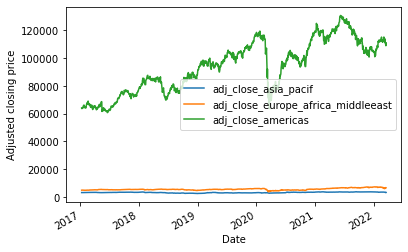

In [56]:
#########################################
#       Pandas Built-in Matplotlib      #
#########################################
%matplotlib inline
ax = df_merged[['adj_close_asia_pacif','adj_close_europe_africa_middleeast','adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price')
ax.legend()


As each index has it is one scale, max and min, it is difficult to interpret if we plot them together in the same graph.

So, let's normalize it dividing it by its maximum.

In [57]:
df_merged['adj_close_asia_pacif'].iloc[0]

3119.2890625

In [58]:
df_merged['norm_adj_close_asia_pacif'] = df_merged['adj_close_asia_pacif'] / df_merged['adj_close_asia_pacif'].iloc[0]
df_merged['norm_adj_close_europe_africa_middleeast'] = df_merged['adj_close_europe_africa_middleeast'] / \
    df_merged['adj_close_europe_africa_middleeast'].iloc[0]
df_merged['norm_adj_close_americas'] = df_merged['adj_close_americas'] / df_merged['adj_close_americas'].iloc[0]


## Plotting normalized indexes in the same graph.

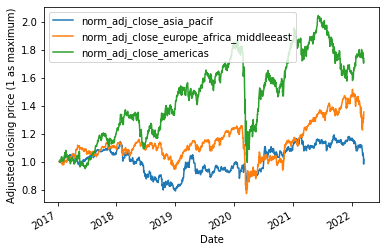

In [59]:
%matplotlib inline
ax = df_merged[['norm_adj_close_asia_pacif','norm_adj_close_europe_africa_middleeast','norm_adj_close_americas']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

MORE PANDAS BUILT-IN GRAPHS: https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Plotting using Matplotlib own functions

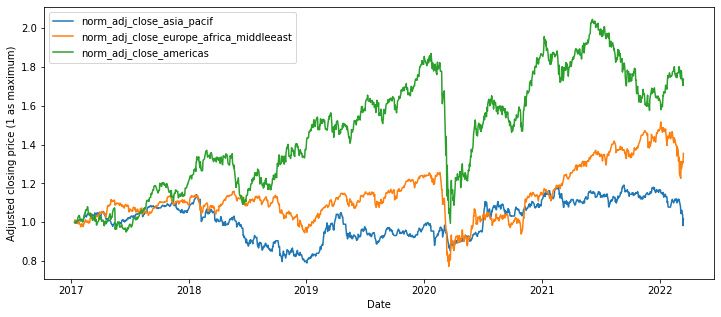

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
ax.plot(df_merged.index, df_merged['norm_adj_close_asia_pacif'], label='norm_adj_close_asia_pacif')
ax.plot(df_merged.index, df_merged['norm_adj_close_europe_africa_middleeast'], label='norm_adj_close_europe_africa_middleeast')
ax.plot(df_merged.index, df_merged['norm_adj_close_americas'], label='norm_adj_close_americas')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (1 as maximum)')
ax.legend()

# Exercise 1 - Create a graph comparing 3 cryptocurrencies from the list below, over the period of 01/01/2021 until yesterday, all crypto should start at 1:
* ticker = BTC-USD  / crypto name = Bitcoin USD
* ticker = ETH-USD  / crypto name = Ethereum USD
* ticker = LTC-USD  / crypto name = Litecoin USD
* ticker = BCH-USD  / crypto name = BitcoinCash USD
* ticker = BSV-USD  / crypto name = BitcoinSV USD
* ticker = DOT1-USD  / crypto name = Polkadot USD
* ticker = EOS-USD  / crypto name = EOS USD
* ticker = LINK-USD  / crypto name = Chainlink USD
* ticker = BNB-USD  / crypto name = BinanceCoin USD
* ticker = VET-USD  / crypto name = VeChain USD
* ticker = ATOM1-USD  / crypto name = Cosmos USD
* ticker = DOT2-USD  / crypto name = Polkadot USD
* ticker = TRX-USD  / crypto name = TRON USD
* ticker = ATOM2-USD  / crypto name = Cosmos USD
* ticker = NEO-USD  / crypto name = NEO USD
* ticker = XTZ-USD  / crypto name = Tezos USD
* ticker = XEM-USD  / crypto name = NEM USD
* ticker = USDT-USD  / crypto name = Tether USD
* ticker = USDC-USD  / crypto name = USDCoin USD
* ticker = XMR-USD  / crypto name = Monero USD
* ticker = DASH-USD  / crypto name = Dash USD
* ticker = ZEC-USD  / crypto name = Zcash USD
* ticker = XRP-USD  / crypto name = Ripple USD
* ticker = ADA-USD  / crypto name = Cardano USD
* ticker = XLM-USD  / crypto name = Stellar USD
* ticker = CCXX-USD  / crypto name = CounosX USD


## Accumulated Return over the period 

In [61]:
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 4, 16)

In [62]:
#market data (SPY)
df_index = pdr.get_data_yahoo("^IBEX", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [63]:
df_index.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  9639.099609  9705.400391  9615.099609  9691.200195  9691.200195   
2020-01-03  9631.200195  9650.700195  9581.200195  9646.599609  9646.599609   
2020-01-06  9585.400391  9618.200195  9492.700195  9600.900391  9600.900391   
2020-01-07  9623.099609  9657.900391  9557.900391  9579.799805  9579.799805   
2020-01-08  9535.099609  9604.299805  9520.299805  9591.400391  9591.400391   

               Volume  
Date                   
2020-01-02  142379600  
2020-01-03  135130000  
2020-01-06  103520400  
2020-01-07  133476100  
2020-01-08  133957600

In [64]:
df_index.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-04-07  6986.899902  7119.100098  6903.600098  7002.000000  7002.000000   
2020-04-08  6930.200195  6952.500000  6860.600098  6951.799805  6951.799805   
2020-04-09  7049.299805  7116.799805  6918.700195  7070.600098  7070.600098   
2020-04-14  7209.700195  7209.700195  7080.299805  7108.600098  7108.600098   
2020-04-15  7065.600098  7086.799805  6816.399902  6839.500000  6839.500000   

               Volume  
Date                   
2020-04-07  260857500  
2020-04-08  155910100  
2020-04-09  240348600  
2020-04-14  259986200  
2020-04-15  289924500

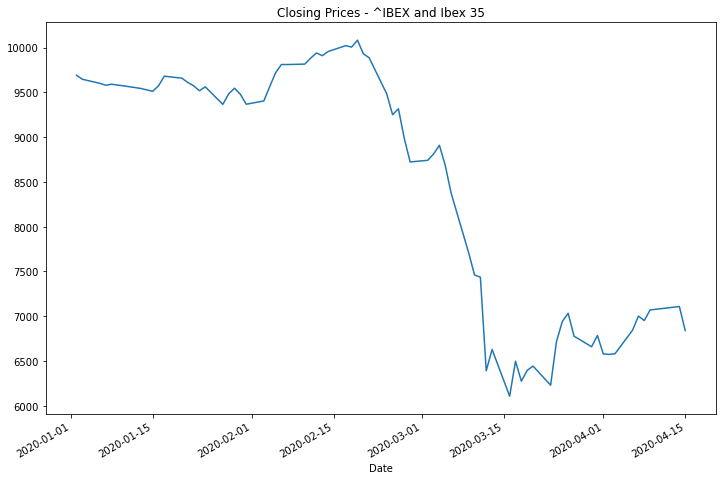

--------------------------------------------------
Accumulated Return over the period: -29.43 %


In [65]:
df_index['Close'].plot(figsize=(12,8))
plt.title("Closing Prices - {} and {}".format("^IBEX",'Ibex 35'))
plt.show()

accumulated_return_perc = 100*(df_index['Close'][-1]/df_index['Close'].iloc[0]-1)
print("-"*50)
print("Accumulated Return over the period: {0:.4g} %".format(accumulated_return_perc))

---

---

# Type of graphs - Static vs. Dynamic

<img src="img/MatplotLib_Bokeh.png" width=1000 height=800 align="left">

---

# Further references on graphs

## Matplotlib

Below is a introduction to the main graphing packages that python has. We'll focus on:

- Matplotlib (pyplot specifically)
- Seaborn (Statistical plots package)

First we load the required libraries. Notice %matplotlib inline, a feature in jupyter notebooks that allows us to forego using plt.show() everytime we want to see a plot.


__BUG: There is a bug on ggplot that need fixing to access the sample data:__
https://github.com/yhat/ggpy/issues/662

In [66]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.style
%matplotlib inline

#data
#from ggplot import diamonds
#from ggplot import mtcars

In [70]:
diamonds =  pd.read_csv("data/diamonds.csv")

We import the Diamonds and the Mtcars dataset to make some plots.

In [71]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [72]:
mtcars = pd.read_csv("data/mtcars.csv")

In [73]:
mtcars.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

We look at the data in some more detail to make sure we know what kind of variables it has. For plotting it is extremely important that we know whether a variable is categorical or numerical.

In [74]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Let's start with how we make a simple plots, there is different ways to tell matplotlib what columns we want to focus on.

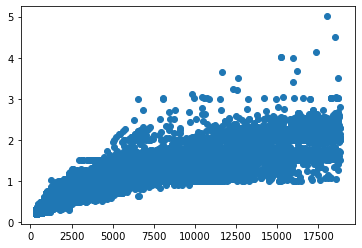

In [75]:
# 2 Ways of calling variables :
#Brackets
plt.scatter( 
x = diamonds['price'], 
y = diamonds['carat'])

We also can very easily set themes for our plots with matplotlib.style.use. For all of you ggplot fans we can get that look back!

In [76]:
# Personnalize your matplotlib

matplotlib.style.use('ggplot')
matplotlib.style.use('dark_background')

plt.style.use('default')


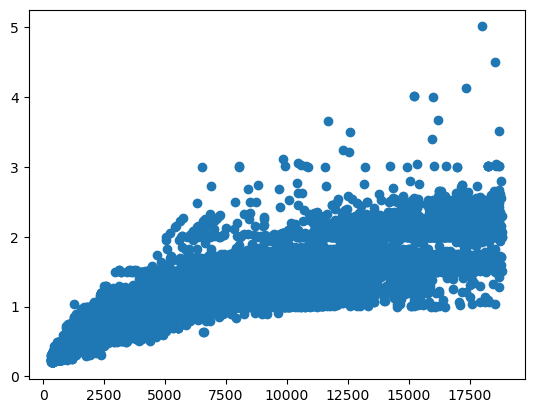

In [77]:
#Dots
plt.scatter(
x = diamonds.price,
y = diamonds.carat)


### Main plots that are used
- plt.hist()
- plt.bar()
- plt.plot()
- plt.scatter()

### Plotting a simple scatter plot

Using the diamonds dataset to do a simple scatter plot

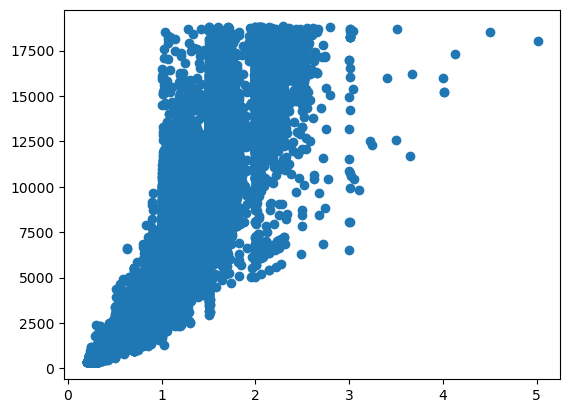

In [78]:
plt.scatter(x=diamonds.carat,y=diamonds.price)

### Customizing the plot title and axis title

We could use xlabel and ylabel to add axis titles in the graph


Text(0.5, 1.0, 'Diamonds')

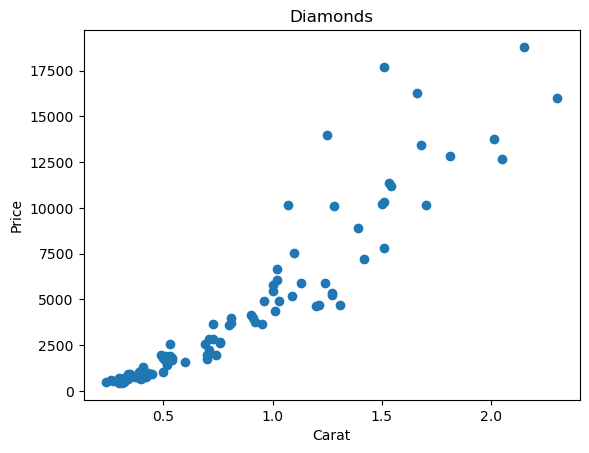

In [79]:
df=diamonds.sample(100,random_state=22)
plt.scatter(x=df.carat,y=df.price)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Changing the shape

We could use the marker function in plt.scatter to to change the shape of the chart

Text(0.5, 1.0, 'Diamonds')

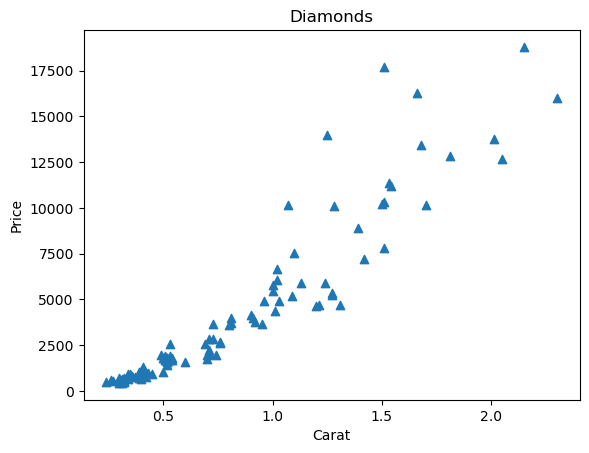

In [80]:
plt.scatter(x=df.carat,y=df.price,marker='^')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing : Changing the color (Option 1)

We could change the color by adding the parameter c=(color code) in plt.scatter

Text(0.5, 1.0, 'Diamonds')

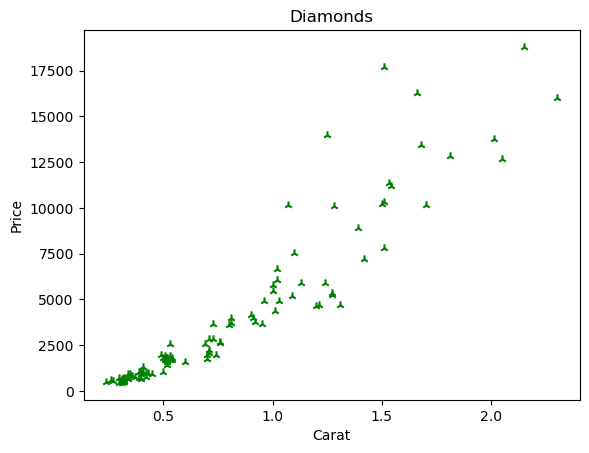

In [81]:
plt.scatter(x=df.carat,y=df.price,c='g',
marker='2')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Changing the color (Option 2)

We could also change the color by using the hexadecimal format

Text(0.5, 1.0, 'Diamonds')

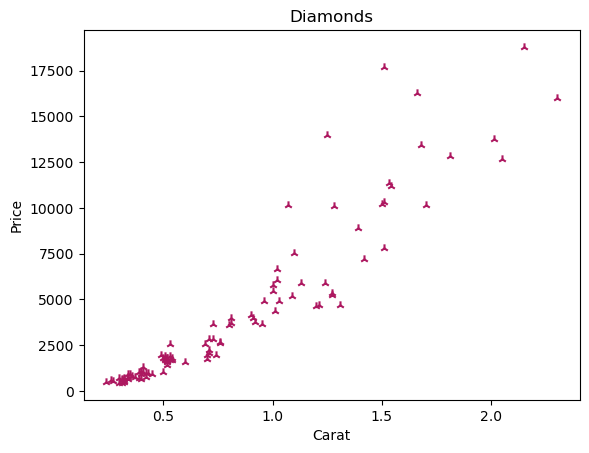

In [82]:
plt.scatter(x=df.carat,y=df.price,c='#ad1860',
marker='2')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")

### Customizing: Annotations

We could add annotations using plt.annotate to highlight outliers or influencers

Text(3, 5, 'Costliest Diamond')

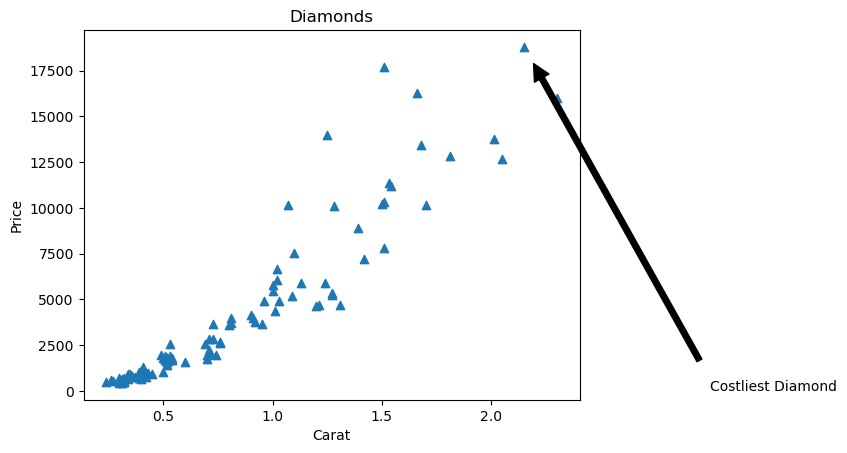

In [83]:
plt.scatter(x=df.carat,y=df.price,marker='^')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")
y_max=max(df.price)
x_max=df.carat[df.price==y_max]
plt.annotate('Costliest Diamond', xy=(x_max,y_max), xytext=(3, 5),
    arrowprops=dict(facecolor='black', shrink=0.05))

# Exercise 2 - Calculate the Accumulated Return over the period of 01/01/2021 until yesterday for at least 3 cryptocurrencies and add the 3 cryptos to the same graph:
* ticker = BTC-USD  / crypto name = Bitcoin USD
* ticker = ETH-USD  / crypto name = Ethereum USD
* ticker = LTC-USD  / crypto name = Litecoin USD
* ticker = BCH-USD  / crypto name = BitcoinCash USD
* ticker = BSV-USD  / crypto name = BitcoinSV USD
* ticker = DOT1-USD  / crypto name = Polkadot USD
* ticker = EOS-USD  / crypto name = EOS USD
* ticker = LINK-USD  / crypto name = Chainlink USD
* ticker = BNB-USD  / crypto name = BinanceCoin USD
* ticker = VET-USD  / crypto name = VeChain USD
* ticker = ATOM1-USD  / crypto name = Cosmos USD
* ticker = DOT2-USD  / crypto name = Polkadot USD
* ticker = TRX-USD  / crypto name = TRON USD
* ticker = ATOM2-USD  / crypto name = Cosmos USD
* ticker = NEO-USD  / crypto name = NEO USD
* ticker = XTZ-USD  / crypto name = Tezos USD
* ticker = XEM-USD  / crypto name = NEM USD
* ticker = USDT-USD  / crypto name = Tether USD
* ticker = USDC-USD  / crypto name = USDCoin USD
* ticker = XMR-USD  / crypto name = Monero USD
* ticker = DASH-USD  / crypto name = Dash USD
* ticker = ZEC-USD  / crypto name = Zcash USD
* ticker = XRP-USD  / crypto name = Ripple USD
* ticker = ADA-USD  / crypto name = Cardano USD
* ticker = XLM-USD  / crypto name = Stellar USD
* ticker = CCXX-USD  / crypto name = CounosX USD


### Customizing: Addining an equation to chart

We could add an equation to an existing chart by using the plt.text function

Text(1.17, 2500, 'ln(y) = $b_0 + \\sum_{j=1}^p b_j*x_j$')

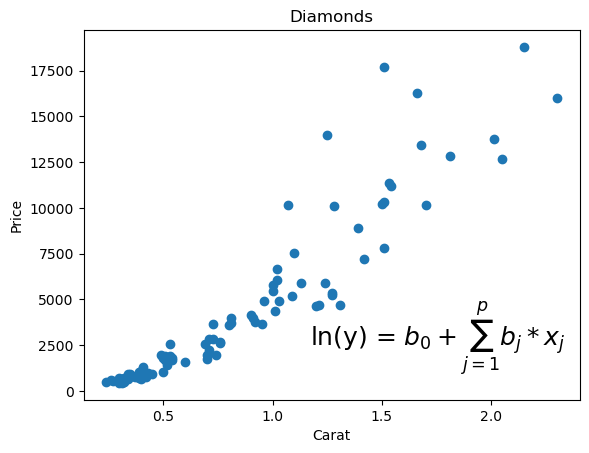

In [84]:
plt.scatter (x=df.carat,y=df.price)
plt.xlabel ("Carat")
plt.ylabel ("Price")
plt.title ("Diamonds")
plt.text(1.17, 2500, r'ln(y) = $b_0 + \sum_{j=1}^p b_j*x_j$', fontsize=18)

### Extra customization
First, a simple plot. We take a sample to make customization clearer.

0.33999999999999997
2.5999999999999996


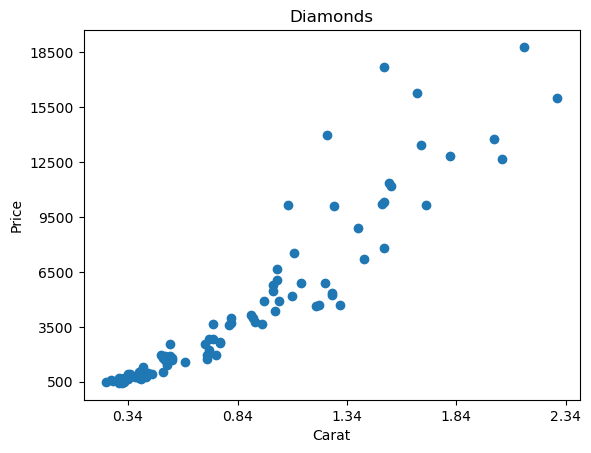

In [85]:
#first graph simple xticks and yticks
plt.scatter(df.carat,df.price,)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.xticks(np.arange(min(df.carat)+0.1, max(df.carat)+0.3, 0.5))
plt.yticks(np.arange(500, max(df.price)+2000, 3000))
plt.title("Diamonds")
print(min(df.carat)+0.1)
print( max(df.carat)+0.3)

And now with a tight layout

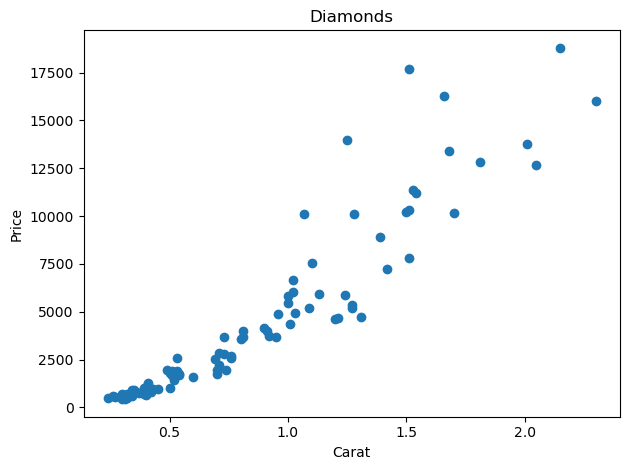

In [86]:
#the same with tight layout
plt.scatter(df.carat,df.price)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Diamonds")
plt.tight_layout()

Let's add some limits on the axis.

Text(0.5, 1.0, 'Diamonds')

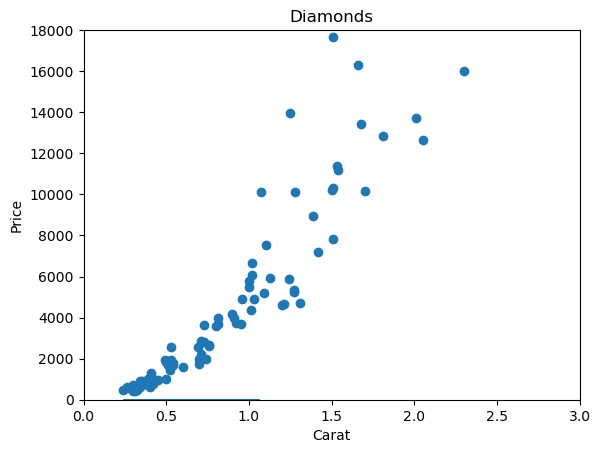

In [87]:
# xlim and y lim
plt.scatter(df.carat,df.price,)
plt.hist(df.carat)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.xlim(0,3)
plt.ylim(0,18000)
plt.title("Diamonds")

Let's look at double axes.

## Seaborn statistical plots
### First Univariate plots

<AxesSubplot:xlabel='cut', ylabel='price'>

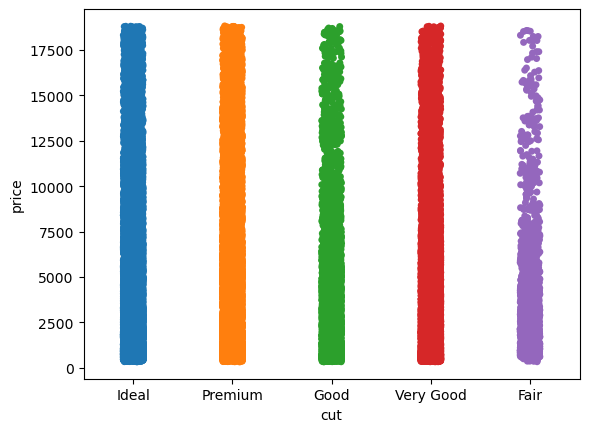

In [88]:
sns.stripplot(x='cut', y='price', data=diamonds)

Swarmplot is similar but spreads out points, it's slow! careful with it. Better for visibility.

<AxesSubplot:xlabel='cyl', ylabel='mpg'>

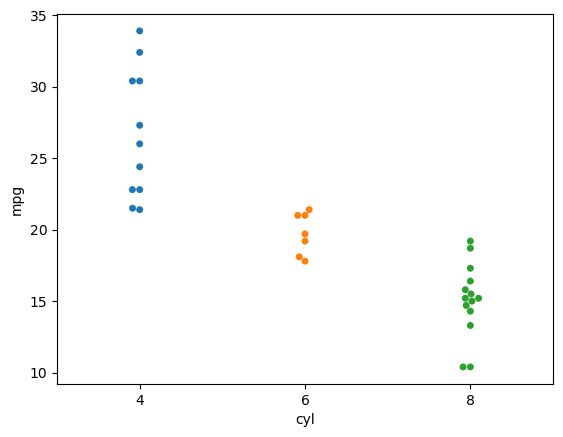

In [89]:
sns.swarmplot(x='cyl', y='mpg', data=mtcars)

A violinplot is a version of a boxplot that shows where most of the datapoints are located.

<AxesSubplot:xlabel='cut', ylabel='price'>

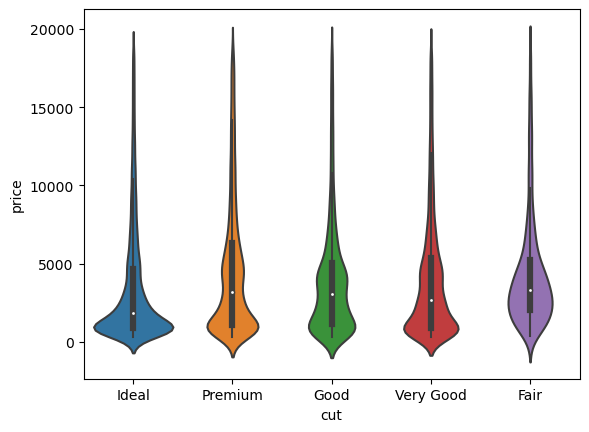

In [90]:
sns.violinplot(x='cut', y='price', data=diamonds)

### Multivariate plots
Jointplot combines a scatter plot with some correlation information and distribution of the points (histograms).

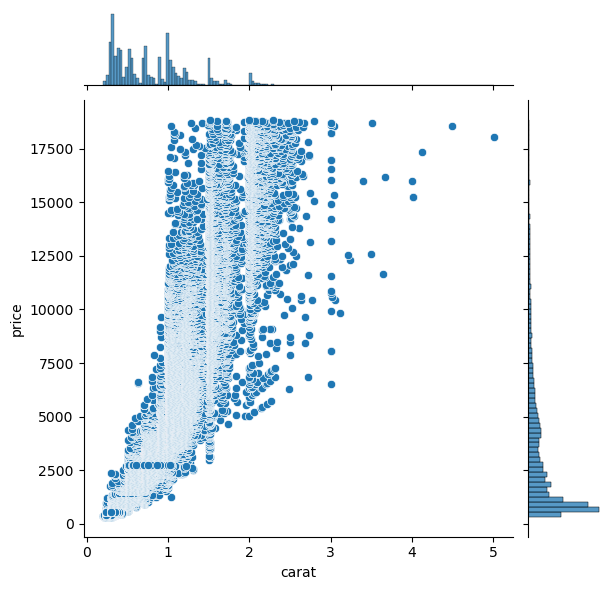

In [91]:
sns.jointplot(x='carat', y='price', data=diamonds)

A pairplot makes plots for each combinations of variables.

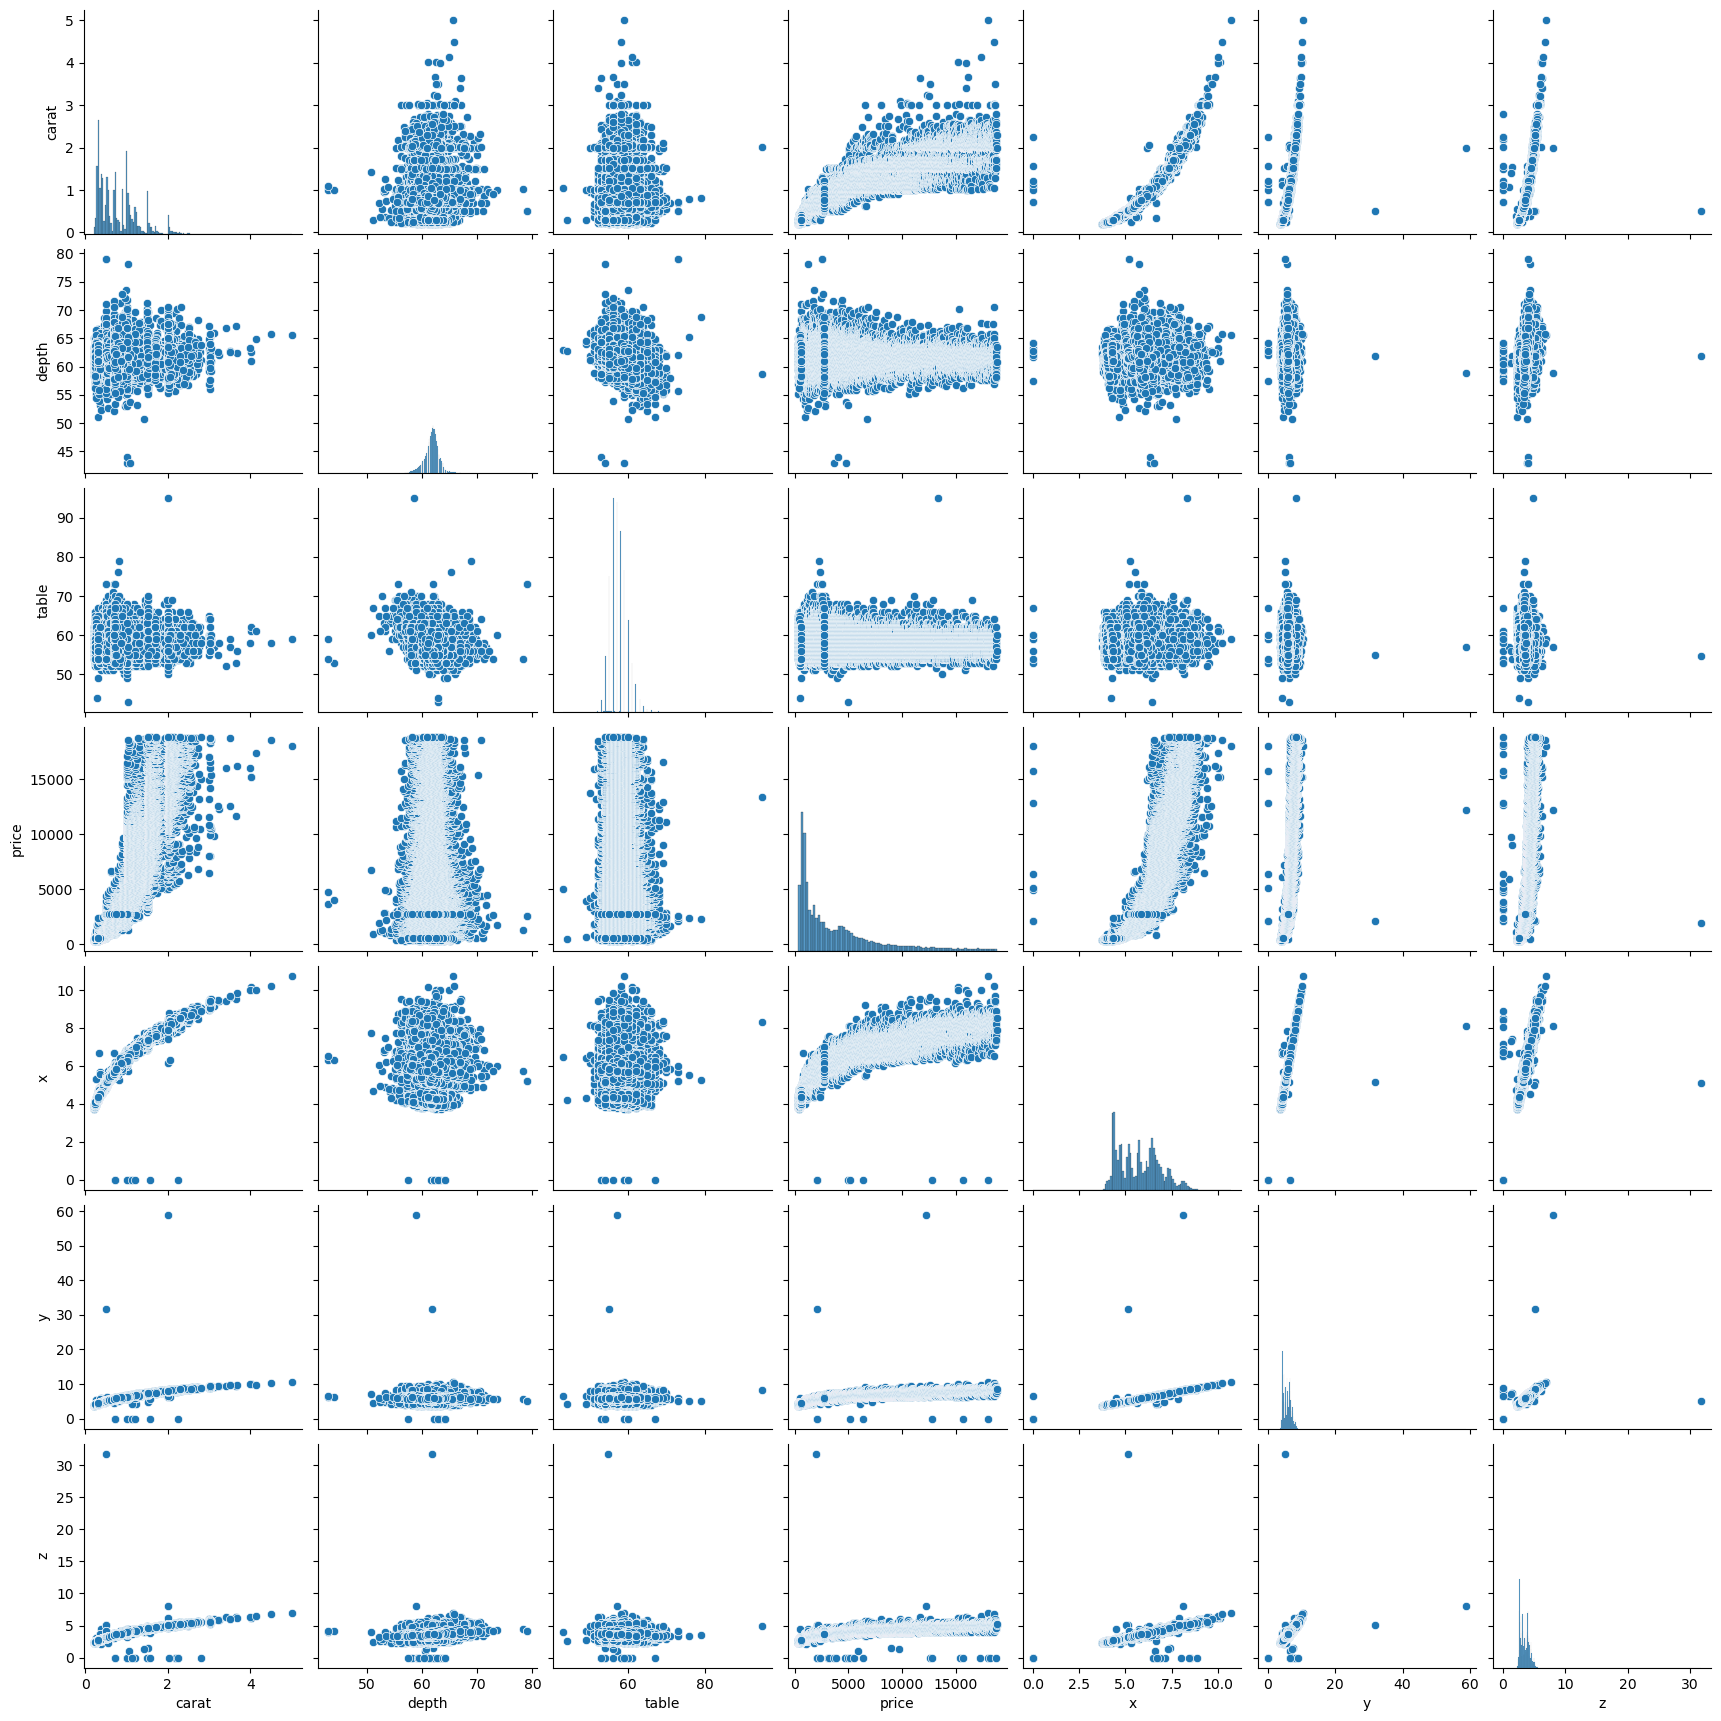

In [92]:
sns.pairplot(data=diamonds) 

## We can also customize the color based on a different variable.

The next code takes too much time and resource, you can try running at your own risk! I don't recommend!

In [93]:
#sns.pairplot(data=diamonds, hue='carat')

---

Let's also look at correlations between the numerical variables and plot them in a heatmap.

In [94]:
diamonds2 = diamonds.drop(diamonds.columns[[1, 2, 3]], axis=1)

In [95]:
diamonds2.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
covars = diamonds2.corr() 
sns.heatmap(covars)

### statistical plots
Seaborn is really good for statistics. Automatically including regression lines with lmplot.

In [ ]:
sns.lmplot(x='carat', y='price', data=diamonds) #lnplot

Customization is a bit tricky because you need to access the underlying matplotlib code with a dictionary.

In [ ]:
sns.lmplot(x='carat', y='price', data=diamonds, hue='cut', scatter_kws={'alpha':0.1})

We can also do a regplot which allows for higher order polynomial regressions.

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds, order=2) #regressionplot or residual plot

Residual analysis is also very easy.

In [ ]:
sns.residplot(x='carat', y='price', data=diamonds)

And finally, just a simple boxplot!

In [ ]:
sns.boxplot(x='cut', y='price', data=diamonds)

---

## Bokeh

https://docs.bokeh.org

In [11]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
import numpy as np

def datetime_transf(x):
    return np.array(x, dtype=np.datetime64)

p1 = figure(x_axis_type="datetime", title='Adjusted closing price (1 as maximum)')
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_asia_pacif'], color='#A6CEE3', legend=ticker_asia_pacif)
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_europe_africa_middleeast'], color='#B2DF8A', 
        legend=ticker_europe_africa_middleeast)
p1.line(datetime_transf(df_merged.index), df_merged['norm_adj_close_americas'], color='#FB9A99', legend=ticker_americas)
output_file("three_indexes.html", title="Manoel Gadi Example")
show(gridplot([[p1]], plot_width=600, plot_height=600))  # open a browser    

NameError: name 'df_merged' is not defined

# Exercise 3 - Using Bokeh, create a graph comparing 3 cryptocurrencies from the list below, over the period of 01/01/2021 until yesterday, all crypto should start at 1:
* ticker = BTC-USD  / crypto name = Bitcoin USD
* ticker = ETH-USD  / crypto name = Ethereum USD
* ticker = LTC-USD  / crypto name = Litecoin USD
* ticker = BCH-USD  / crypto name = BitcoinCash USD
* ticker = BSV-USD  / crypto name = BitcoinSV USD
* ticker = DOT1-USD  / crypto name = Polkadot USD
* ticker = EOS-USD  / crypto name = EOS USD
* ticker = LINK-USD  / crypto name = Chainlink USD
* ticker = BNB-USD  / crypto name = BinanceCoin USD
* ticker = VET-USD  / crypto name = VeChain USD
* ticker = ATOM1-USD  / crypto name = Cosmos USD
* ticker = DOT2-USD  / crypto name = Polkadot USD
* ticker = TRX-USD  / crypto name = TRON USD
* ticker = ATOM2-USD  / crypto name = Cosmos USD
* ticker = NEO-USD  / crypto name = NEO USD
* ticker = XTZ-USD  / crypto name = Tezos USD
* ticker = XEM-USD  / crypto name = NEM USD
* ticker = USDT-USD  / crypto name = Tether USD
* ticker = USDC-USD  / crypto name = USDCoin USD
* ticker = XMR-USD  / crypto name = Monero USD
* ticker = DASH-USD  / crypto name = Dash USD
* ticker = ZEC-USD  / crypto name = Zcash USD
* ticker = XRP-USD  / crypto name = Ripple USD
* ticker = ADA-USD  / crypto name = Cardano USD
* ticker = XLM-USD  / crypto name = Stellar USD
* ticker = CCXX-USD  / crypto name = CounosX USD


---

# Plotnine 
  

In [96]:
!pip install plotnine

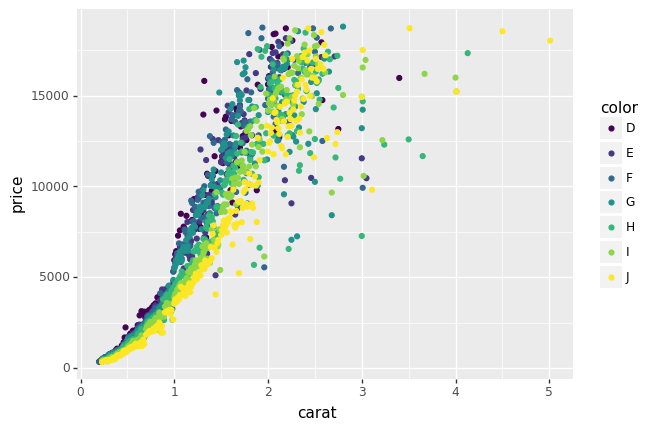

<ggplot: (160545071806)>

In [97]:
from plotnine import *
from plotnine.data import diamonds

g = ggplot(diamonds, aes(x='carat', y='price', color='color')) + geom_point(stat='summary')
g

# Plotnine 

reference: https://plotnine.readthedocs.io/en/stable/
        
A Grammar of Graphics for Python

plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot.

Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots easy to think about and then create, while the simple plots remain simple.      

__ggplot2 is Hadley Wickham’s R package for  producing “elegant graphics for data analysis”__

It is an implementation of many of the ideas for graphics  introduced in Lee Wilkinson’s Grammar of Graphics

These ideas and the syntax of ggplot2 help to think of  graphs in a new and more general way

Produces pleasing plots, taking care of many of the fiddly  details (legends, axes, colors, …)

It is built upon the “grid” graphics system

It is open software, with a large number of gg_ extensions.  See: http://www.ggplot2-exts.org/gallery/


In [90]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars



ggplot() takes care of the rest leaving us with an __empty canvas__

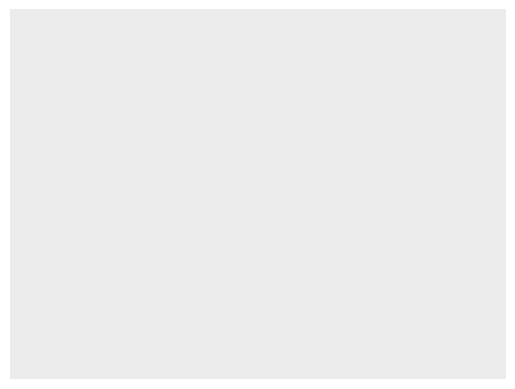

<ggplot: (160540139337)>

In [98]:
(ggplot(mtcars)) #empty canvas

In ggplot2, just map the data variables  to aesthetic attributes
aes(x, y, shape, color, size, …)


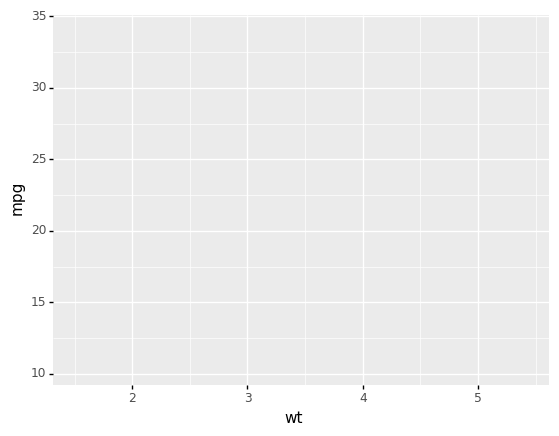

<ggplot: (87456067630)>

In [92]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))) #sung asethics


aes() mappings set in the call to  ggplot() are passed to geom_point()  here

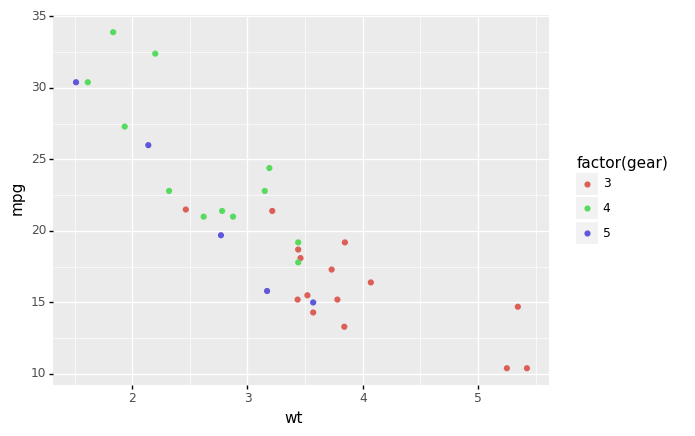

<ggplot: (87456218890)>

In [93]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)')) #telling where each part of the data is going to go 
 + geom_point())

C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


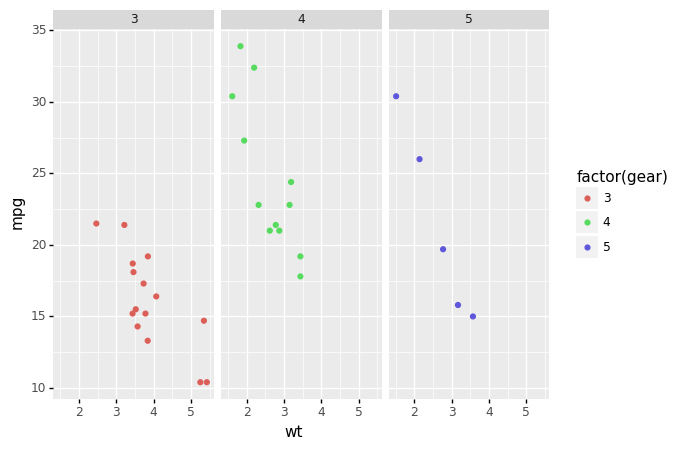

<ggplot: (87452680078)>

In [94]:
(ggplot(mtcars, aes(x='wt', y='mpg', color='factor(gear)'))
 + geom_point()
 + facet_wrap('~gear'))
#the visualization is done in a visual way

In this call,

data=mtcars: data frame

aes(x='wt', y='mpg'): plot variables

aes(color, shape): attributes

geom_point(): what to plot

the coordinate system is taken to  be the standard Cartesian (x,y)


C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


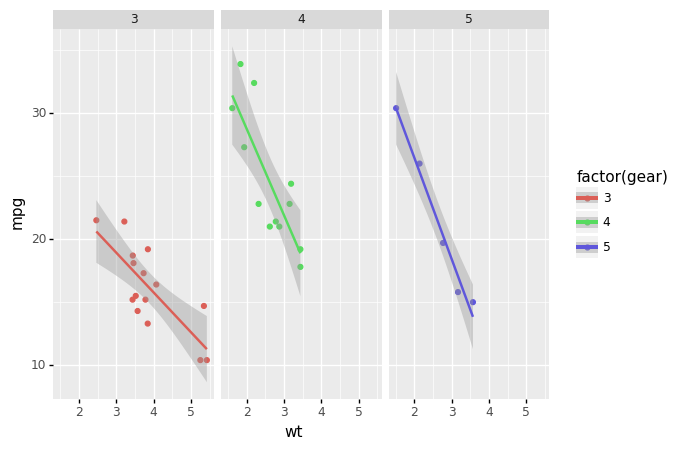

<ggplot: (87455978831)>

In [95]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

Wow! I can really see something there.

How can I enhance this visualization?

Easy: add a geom_smooth() to fit linear  regressions for each level of cyl


## Every graph can be described as a combination of  independent building blocks:
* __data__: a data frame: quantitative, categorical; local or data base query
* __aesthetic__ mapping of variables into visual properties: size, color, x, y
* __geometric__ objects (“geom”): points, lines, areas, arrows, …
* __coordinate system__ (“coord”): Cartesian, log, polar, map,


<img src="img/plotnine1.png" align="center">


## Other GoG building blocks:
* statistical transformations (“stat”) -- data summaries:  mean, sd, binning & counting, …

* scales: legends, axes to allow reading data from a plot


<img src="img/plotnine2.png" align="center">

* position adjustments: jitter, dodge, stack, …

<img src="img/plotnine3.png" align="center">

* faceting: small multiples or conditioning to break a plot  into subsets!

<img src="img/plotnine4.png" align="center">


The implementation of GoG ideas in ggplot2 for R  created a more expressive language for data graphs

layers:	graph elements combined with “+” (read: “and”)


themes: change graphic elements consistently

<img src="img/plotnine5.png" align="center">

C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


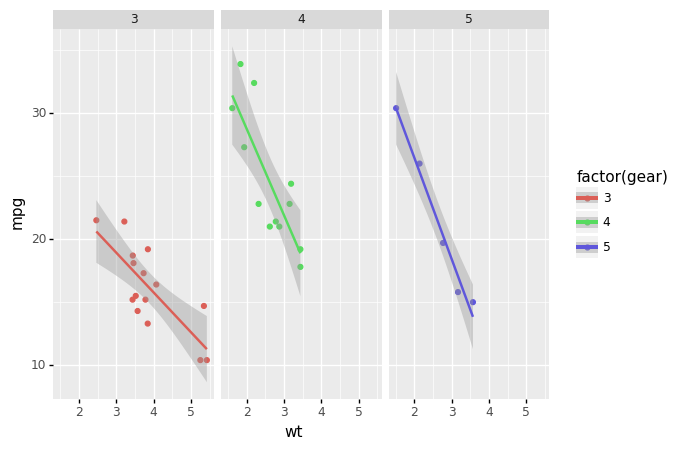

<ggplot: (87456551178)>

In [96]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))

C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


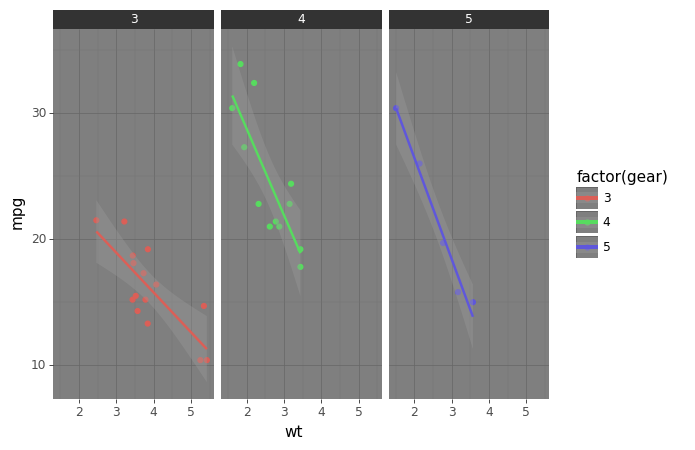

<ggplot: (87456535528)>

In [97]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear')
 + theme_dark())

C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


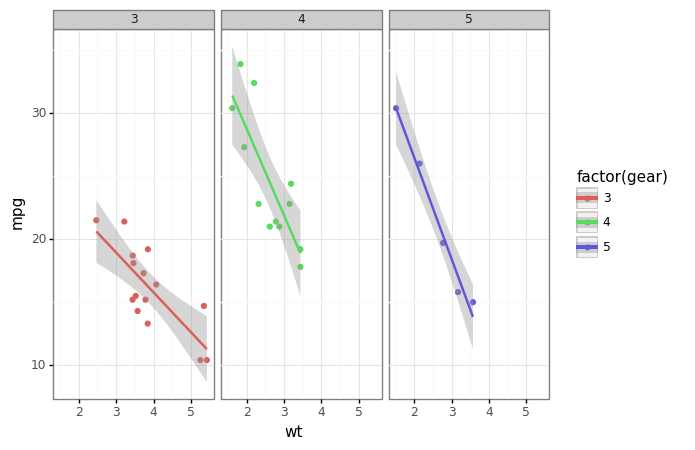

<ggplot: (87456395204)>

In [98]:
(ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear')
 + theme_bw())

# Anatomy of a ggplot!
    
<img src="img/plotnine6.png" align="center">

## Using slightly altered colors to make a distinction between related data

In [99]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

First, we make up some data. The data we create has y for actual data value and yfit for a hypothetical fitted model. It also has a category column cat.

In [100]:
n = 10
df = pd.DataFrame({'x': np.arange(n),
                   'y': np.arange(n),
                   'yfit': np.arange(n) + np.tile([-.2, .2], n//2),
                   'cat': ['a', 'b']*(n//2)})
df


x  y  yfit cat
0  0  0  -0.2   a
1  1  1   1.2   b
2  2  2   1.8   a
3  3  3   3.2   b
4  4  4   3.8   a
5  5  5   5.2   b
6  6  6   5.8   a
7  7  7   7.2   b
8  8  8   7.8   a
9  9  9   9.2   b

Initial plot

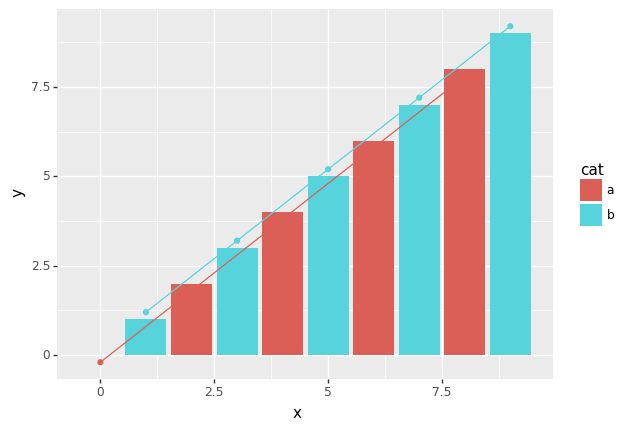

<ggplot: (160546178446)>

In [101]:
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
)

There is a clash of colors between the actual data (the bars) and the fitted model (the points and lines). A simple solution is to adjust the colors of the fitted data slightly. We do that by varying the lightness of the default color scale, make them a little darker.

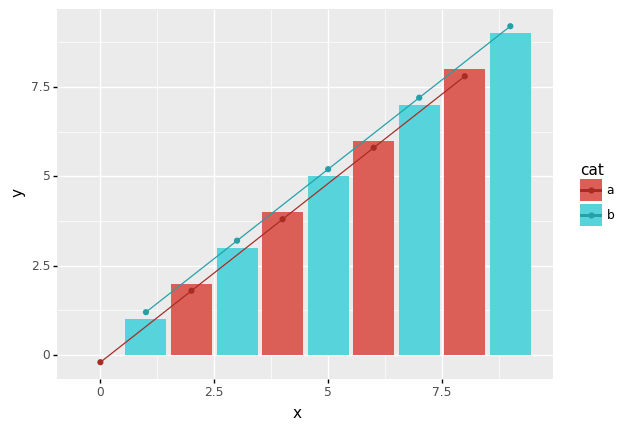

<ggplot: (87456614834)>

In [102]:
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
 + scale_color_discrete(l=.4)                                     # new
)

There are two main pieces of information in the plot, but we a single combined legend. Since we use separate aesthetics for the actual data and fitted model, we can have distinct legends for both.

We manually define the legend for the fill and color aesthetics, this overrides the automatic legend creation.

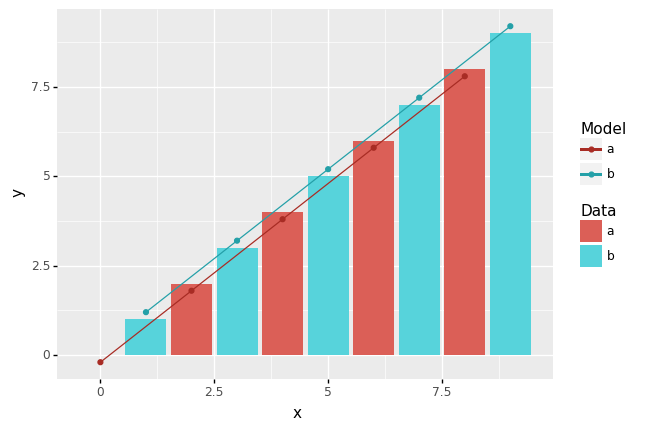

<ggplot: (87456755794)>

In [103]:
(ggplot(df)
 + geom_col(aes('x', 'y', fill='cat'))
 + geom_point(aes('x', y='yfit', color='cat'))
 + geom_path(aes('x', y='yfit', color='cat'))
 + scale_color_discrete(l=.4)
 + guides(                                                        # new
     fill=guide_legend(title='Data'),
     color=guide_legend(title='Model'))
)

## When the automatic groups are not sufficient

In [104]:
import pandas as pd
from plotnine import *

%matplotlib inline
df = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'],
    'pos': [1, 2, 3, 4],
    'num_of_letters': [5, 4, 5, 5]
})

df


letter  pos  num_of_letters
0  Alpha    1               5
1   Beta    2               4
2  Delta    3               5
3  Gamma    4               5

C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


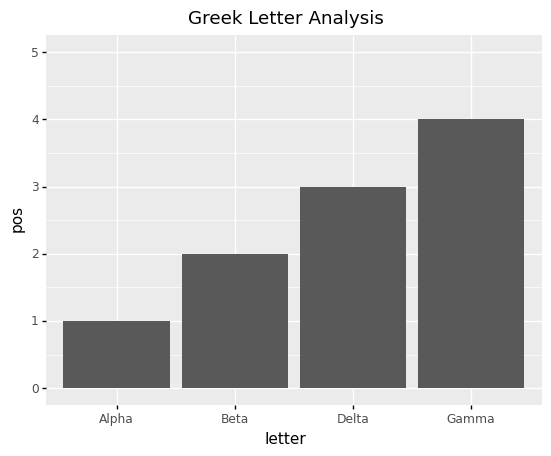

<ggplot: (87456615431)>

In [105]:
(ggplot(df)
 + geom_col(aes(x='letter', y='pos'))
 + geom_line(aes(x='letter', y='num_of_letters'))
 + ggtitle('Greek Letter Analysis')
)

We get a plot with a warning and no line(s). This is not what we expected.

The issue is we have 4 groups (Alpha, Beta, ...) and each of those groups has a single point. This is a case where the automatic grouping is not sufficient (or just not what you expect). The solution is to manually set the group for geom_line so that all points belong to one group.

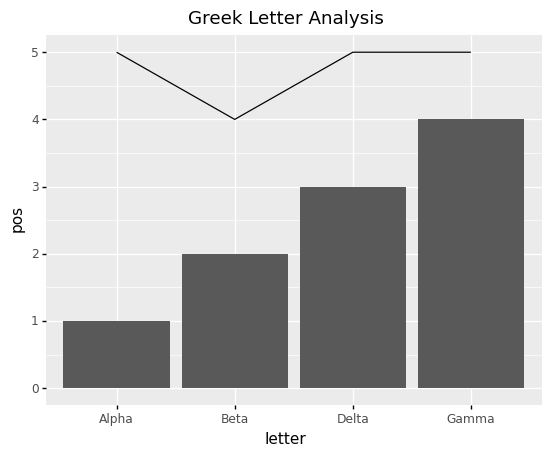

<ggplot: (87456801994)>

In [106]:
(ggplot(df)
 + geom_col(aes(x='letter', y='pos'))
 + geom_line(aes(x='letter', y='num_of_letters'), group=1)
 + ggtitle('Greek Letter Analysis')
)

We get no warning and we get lines.

We can add some color to such a plot.

C:\Users\manoe\AppData\Roaming\Python\Python39\site-packages\plotnine\geoms\geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


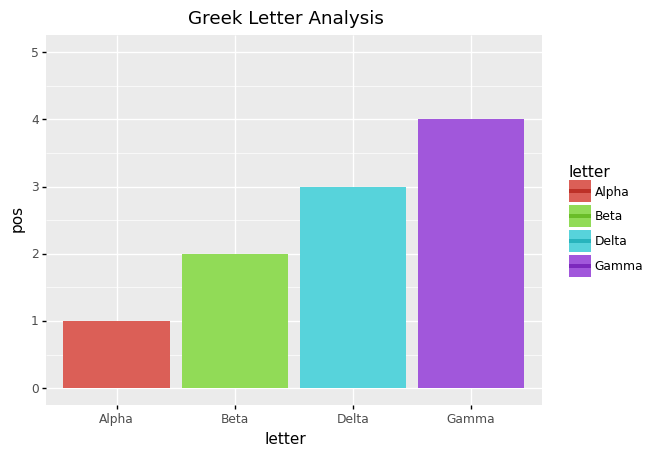

<ggplot: (87457101032)>

In [107]:
(ggplot(df)
 + geom_col(aes(x='letter',y='pos', fill='letter'))
 + geom_line(aes(x='letter', y='num_of_letters', color='letter'), size=1)
 + scale_color_hue(l=0.45)                                  # some contrast to make the lines stick out
 + ggtitle('Greek Letter Analysis')
)



## Custom sorting of plot series

In [108]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

In [109]:
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

### Bar plot of manufacturer - Default Output

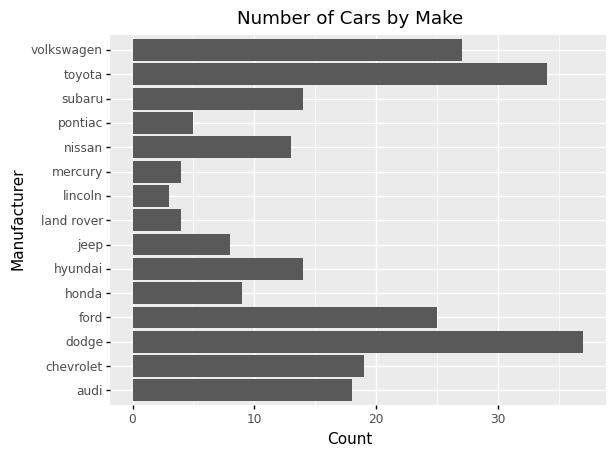

<ggplot: (87457292427)>

In [110]:
(ggplot(mpg)
 + aes(x='manufacturer')
 + geom_bar(size=20)
# + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

### Bar plot of manufacturer - Ordered by count (Categorical)

By default the discrete values along axis are ordered alphabetically. If we want a specific ordering we use a pandas.Categorical variable with categories ordered to our preference.

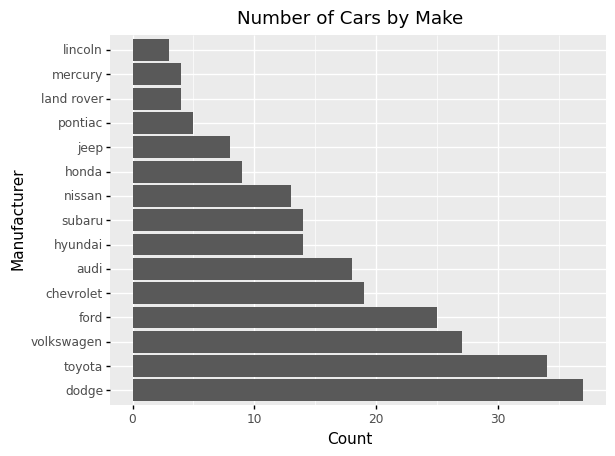

<ggplot: (87456749249)>

In [111]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)

# assign to a new column in the DataFrame
mpg = mpg.assign(manufacturer_cat = manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)


#some of the adaptions of the graphs

### adding color...

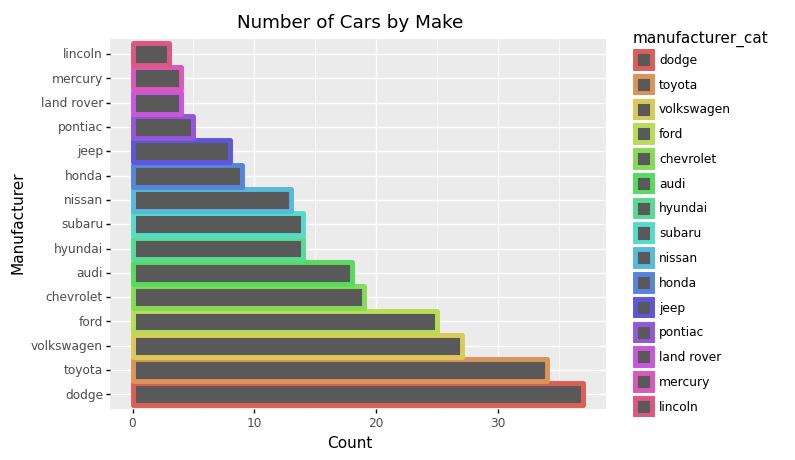

<ggplot: (87458417146)>

In [112]:
(ggplot(mpg)
 + aes(x='manufacturer_cat', color='manufacturer_cat')
 + geom_bar(size=2)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

# Exercise 4 - analyse the huge FLIGHT dataset using plotnine

In [113]:
flights = pd.read_csv('data/flights.csv')


C:\Users\manoe\AppData\Local\Temp\ipykernel_5292\2668951909.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.


In [114]:
flights

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                  ANC                 SEA                    5  ...   
1                  LAX                 PBI                   10  ...   
2                  SFO                 CLT                   20  ...   
3                  LAX                 MIA                   20  ...   
4                  SEA                 ANC                   25  ...   
...                ...                 ...                  ...  ...   
5819074            LAX                 BOS                 2359  ...   
5819075            JFK                 PSE                 2359  ...   
5819076            JFK                 SJU                 2359  ...   
5819077            MCO                 SJU                 2359  ...   
5819078            JFK                 BQN                 2359  ...   

         ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0               408.0          -22.0         0          0   
1               741.0           -9.0         0          0   
2               811.0            5.0         0          0   
3               756.0           -9.0         0          0   
4               259.0          -21.0         0          0   
...               ...            ...       ...        ...   
5819074         753.0          -26.0         0          0   
5819075         430.0          -16.0         0          0   
5819076         432.0           -8.0         0          0   
5819077         330.0          -10.0         0          0   
5819078         442.0            2.0         0          0   

         CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0                        NaN               NaN             NaN            NaN   
1                        NaN               NaN             NaN            NaN   
2                        NaN               NaN             NaN            NaN   
3                        NaN               NaN             NaN            NaN   
4                        NaN               NaN             NaN            NaN   
...                      ...               ...             ...            ...   
5819074                  NaN               NaN             NaN            NaN   
5819075                  NaN               NaN             NaN            NaN   
5819076                  NaN               NaN             NaN            NaN   
5819077                  NaN               NaN             NaN            NaN   
5819078                  NaN               NaN             NaN            NaN   

         LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                        NaN            NaN  
1                        NaN            NaN  
2                        NaN            NaN  
3                        NaN            NaN  
4                        NaN            NaN  
...                      ...            ...  
5819074                  NaN            NaN  
5819075                  NaN            NaN  
5819076                  NaN            NaN  
5819077                  NaN            NaN  
5819078

In [115]:
flights[['MONTH','ARRIVAL_DELAY']].sample(n=1000, random_state=1).fillna(0).groupby('MONTH').mean()

ARRIVAL_DELAY
MONTH               
1           8.308642
2          10.338235
3           1.716049
4          -0.944444
5           5.047619
6           3.764706
7           8.301075
8           0.741573
9           3.053191
10         -1.329114
11         -2.543210
12          3.064516

1. Use simple EDA (head, describe and value_counts) then,  using plotnine, create at least 3 graphs in order to understand the data and explain it for colleagues

1. Using plotnine  and flights.csv create a histogram of the mean arrival delay by month and make it colorful with white background theme

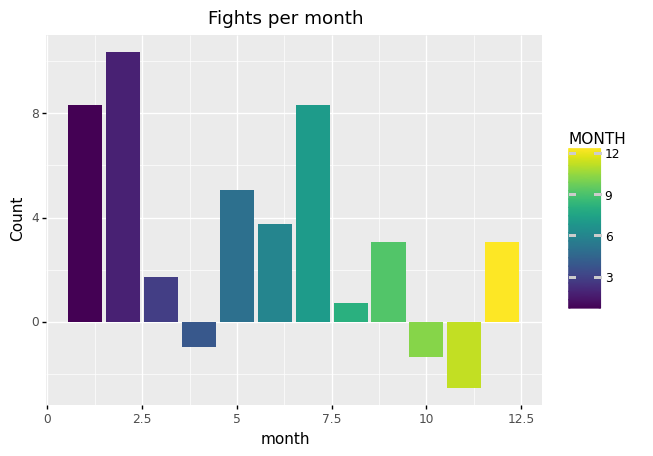

<ggplot: (87461188066)>

In [116]:
(ggplot(flights.sample(n=1000, random_state=1).fillna(0))
 + aes(x='MONTH', y= 'ARRIVAL_DELAY',fill='MONTH')
 + geom_bar(size=2,stat = "summary")
 #+ coord_flip()
 + labs(y='Count', x='month', title='Fights per month')
)

# Optional KAHOOT - Ggplot and grammar of graphics - Take on your own time - No Participation Given

LINK TO THE KAHOOT: https://kahoot.it/challenge/05323508?challenge-id=a3613dad-8cfd-48a4-b5f2-2043399b46ec_1661246813330 

<img src="img/kahoot_ggplot.png" align="center">

### More complex things -  Plotnine - adding vertical lines and histograms to same chart 

In [117]:
dataset=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [118]:
!pip install plydata

Defaulting to user installation because normal site-packages is not writeable


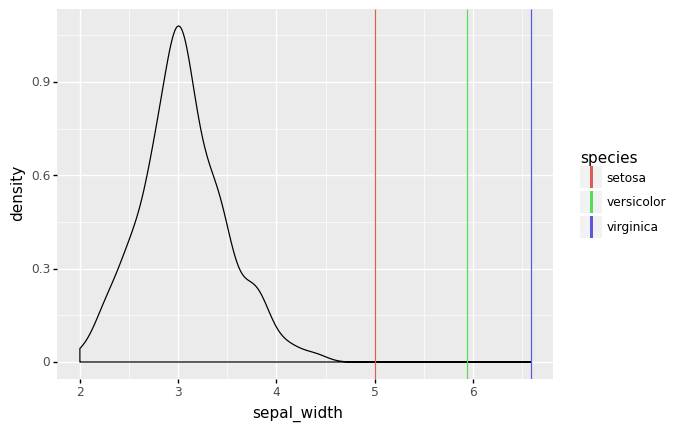

<ggplot: (87458369877)>

In [119]:
from plotnine import *
from plydata import *

df = (
    dataset
    >> group_by('species')
    >> summarise(sl_mean='mean(sepal_length)')
)

(ggplot(dataset, aes(x='sepal_width'))
 + geom_density()
 + geom_vline(df, aes(xintercept='sl_mean', color='species'))
)



---

---
# Plotly & Dash

https://dash.plotly.com/installation



Plotly is a free and open-source graphing library for Python. We recommend you read our Getting Started guide for the latest installation or upgrade instructions, then move on to our Plotly Fundamentals tutorials or dive straight in to some Basic Charts tutorials.

In [ ]:
!pip install "jupyterlab>=3" "ipywidgets>=7.6" 

In [ ]:
!pip install jupyter-dash 

In [120]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

## or using FigureWidget objects.

In [121]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])

import plotly.graph_objects as go
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra>…

In [122]:
!pip install -U kaleido 

In [123]:
<html>
    <body>
        <div>
            <p> Select the color </p>
            GRAPH
        </div>
    </body>
</html>

SyntaxError: invalid syntax (1780206286.py, line 1)

In [124]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False, port=5000)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:5000/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


C:\Users\manoe\AppData\Local\Temp\ipykernel_5292\592816322.py:7: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\manoe\AppData\Local\Temp\ipykernel_5292\592816322.py:8: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [125]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Elegir el color:"),
    dcc.Dropdown(
        id="dropdown",
        options=[
            {'label': x, 'value': x}
            for x in ['Gold', 'MediumTurquoise', 'LightGreen']
        ],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], marker_color=color))
    return fig

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [126]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Color:"),
    dcc.Dropdown(
        id="dropdown",
        options=[
            {'label': x, 'value': x}
            for x in ['Gold', 'MediumTurquoise', 'LightGreen']
        ],
        value='Gold',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])
def display_color(color):
    fig = go.Figure(
        data=go.Bar(y=[2, 3, 1], marker_color=color))
    return fig

app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [127]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output


app = dash.Dash()

df = px.data.stocks()


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Styling using html components', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Google', 'value':'GOOG' },
            {'label': 'Apple', 'value':'AAPL'},
            {'label': 'Amazon', 'value':'AMZN'},
            ],
        value = 'GOOG'),
        dcc.Graph(id = 'bar_plot')
    ])
    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Scatter(x = df['date'], y = df['{}'.format(dropdown_value)],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
    
    fig.update_layout(title = 'Stock prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
    return fig  



if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
GOOG
AAPL
AMZN


# Exercise 5 - Using Dash change the code below to use 3 cryptocurrencies data directly retrieved from yahoo.finance, over the period of 01/01/2021 until yesterday, all crypto should start at 1 with:

In [128]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output


app = dash.Dash()

df = px.data.stocks()


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Styling using html components', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Google', 'value':'GOOG' },
            {'label': 'Apple', 'value':'AAPL'},
            {'label': 'Amazon', 'value':'AMZN'},
            ],
        value = 'GOOG'),
        dcc.Graph(id = 'bar_plot')
    ])
    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Scatter(x = df['date'], y = df['{}'.format(dropdown_value)],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
    
    fig.update_layout(title = 'Stock prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
    return fig  



if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
GOOG
AAPL


In [131]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


app = dash.Dash()

#df = px.data.stocks()


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Styling using html components', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Bitcoin', 'value':'BTC-USD' },
            {'label': 'Vechain', 'value':'VET-USD'},
            {'label': 'Cardano', 'value':'ADA-USD'},
            {'label': 'Ripple', 'value':'XRP-USD'},
            ],
        value = 'BTC-USD'),
        dcc.Graph(id = 'bar_plot')
    ])


@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    df = pdr.get_data_yahoo(dropdown_value, start="2021-01-01") #Aqui importacion de SQL etc
    df['{}'.format(dropdown_value)]=df['Adj Close']/df['Adj Close'].iloc[0]
    fig = go.Figure([go.Scatter(x = df.index, y = df['{}'.format(dropdown_value)],\
                     line = dict(color = 'firebrick', width = 4))
                     ])

    fig.update_layout(title = 'Stock prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
    return fig  



if __name__ == '__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
BTC-USD
[*********************100%***********************]  1 of 1 completed
ADA-USD
[*********************100%***********************]  1 of 1 completed
XRP-USD
[*********************100%***********************]  1 of 1 completed
BTC-USD
[*********************100%***********************]  1 of 1 completed


More Dash Examples: examples: https://plex.page/Plotly_Dash_Examples


# Optional KAHOOT - Seaborn and Dash - Take on your own time - No Participation Given

LINK TO THE KAHOOT: https://kahoot.it/challenge/08853738?challenge-id=a3613dad-8cfd-48a4-b5f2-2043399b46ec_1661247441957

<img src="img/kahoot_seaborn_dash.png" align="center">